In [1]:
import wandb
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
from train_utils import update_dir_name, get_default_configs
font_path = 'analyses/font_arial.ttf'
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({'font.size': 12})

# Get wandb run history
api = wandb.Api()
wandb_path = os.path.join("..", "..", "wandb")

In [5]:

wandb_run_name = "M_nst19_dm192_dmb64_nh12_nl2_5_nes50_nf_nUTP_beT_pmt0.9_mtp100.0_SU_eeL_rBBFM_XXXt"
wandb_project_name = "BFMM_ULCA"
run = api.runs(f"andrii-mit/{wandb_project_name}", filters={"display_name": wandb_run_name})[0]

# Get run history
history = run.history()

# Plot metrics over time

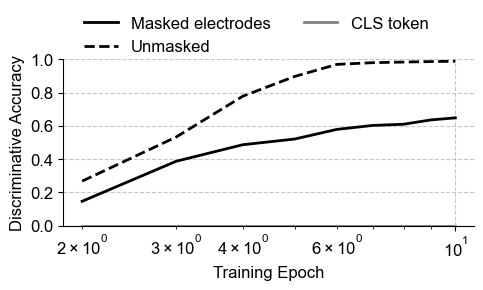

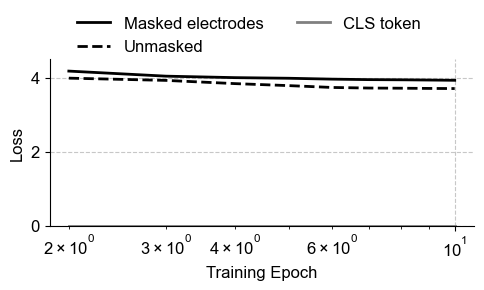

In [6]:
def plot_metrics(history, plot_loss=False, linewidth=2):
    plt.figure(figsize=(5, 3.4))
    
    if not plot_loss:
        # Plot accuracy metrics
        plt.plot(history['_step'], history['test_accuracy_b'], color='black', linewidth=linewidth, label='Masked electrodes')
        plt.plot(history['_step'], history['test_accuracy_a'], color='black', linestyle='--', linewidth=linewidth, label='Unmasked')
        plt.plot(history['_step'], history['test_accuracy_cls'], color='gray', linewidth=linewidth, label='CLS token')
        plt.ylim(0, 1)
        plt.yticks(np.arange(0, 1.1, 0.2))
        plt.ylabel('Discriminative Accuracy')
    else:
        # Plot loss metrics
        plt.plot(history['_step'], history['test_contrastive_b'], color='black', linewidth=linewidth, label='Masked electrodes')
        plt.plot(history['_step'], history['test_contrastive_a'], color='black', linestyle='--', linewidth=linewidth, label='Unmasked')
        plt.plot(history['_step'], history['test_contrastive_cls'], color='gray', linewidth=linewidth, label='CLS token')
        plt.ylim(0, 4.5)
        plt.ylabel('Loss')
    
    plt.xscale('log')
    plt.xlabel('Training Epoch')
    
    # Place legend above the plot in one row
    plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.47, 1.35), ncol=2)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Remove top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    return plt

# Plot accuracy metrics
plot_metrics(history)
plt.savefig("paper_figures/F1_overview/metrics_accuracy.pdf", bbox_inches='tight', transparent=True)
plt.show()

# Plot loss metrics
plot_metrics(history, plot_loss=True)
plt.savefig("paper_figures/F1_overview/metrics_loss.pdf", bbox_inches='tight', transparent=True)
plt.show()


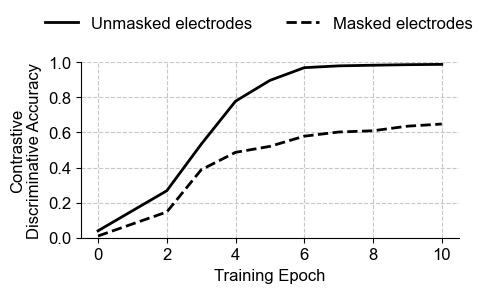

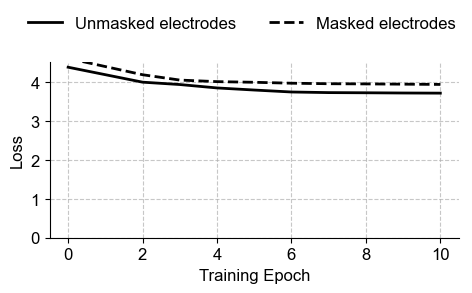

In [11]:
def plot_metrics(history, plot_loss=False, linewidth=2):
    plt.figure(figsize=(5, 3.4))
    
    if not plot_loss:
        steps = history['_step']
        accuracy_b = history['test_accuracy_b']
        accuracy_a = history['test_accuracy_a']

        # Adding the baseline
        steps = [0] + list(steps)
        accuracy_b = [0.01] + list(accuracy_b)
        accuracy_a = [0.0396] + list(accuracy_a)

        # Plot accuracy metrics
        plt.plot(steps, accuracy_a, color='black', linewidth=linewidth, label='Unmasked electrodes')
        plt.plot(steps, accuracy_b, color='black', linestyle='--', linewidth=linewidth, label='Masked electrodes')
        plt.ylim(0, 1)
        plt.yticks(np.arange(0, 1.1, 0.2))
        plt.ylabel('Contrastive\nDiscriminative Accuracy')
    else:
        # Plot loss metrics
        steps = history['_step']
        loss_b = history['test_contrastive_b']
        loss_a = history['test_contrastive_a']

        # Adding the baseline
        steps = [0] + list(steps)
        loss_b = [4.6] + list(loss_b)
        loss_a = [4.3737] + list(loss_a)

        # Plot loss metrics
        plt.plot(steps, loss_a, color='black', linewidth=linewidth, label='Unmasked electrodes')
        plt.plot(steps, loss_b, color='black', linestyle='--', linewidth=linewidth, label='Masked electrodes')
        plt.ylim(0, 4.5)
        plt.ylabel('Loss')
    
    #plt.xscale('log')
    plt.xlabel('Training Epoch')
    
    # Place legend above the plot in one row
    plt.legend(frameon=False, loc='upper center', bbox_to_anchor=(0.47, 1.35), ncol=2)
    
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Remove top and right spines
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    return plt

# Plot accuracy metrics
plot_metrics(history)
plt.savefig("paper_figures/F1_overview/metrics_accuracy.pdf", bbox_inches='tight', transparent=True)
plt.show()

# Plot loss metrics
plot_metrics(history, plot_loss=True)
plt.savefig("paper_figures/F1_overview/metrics_loss.pdf", bbox_inches='tight', transparent=True)
plt.show()
